# Building A Simple HandWritten Digits Classifier Using MLPs

### Loading MNIST DataBase


In [33]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test)= mnist.load_data()

# Visualizing Loaded Data 

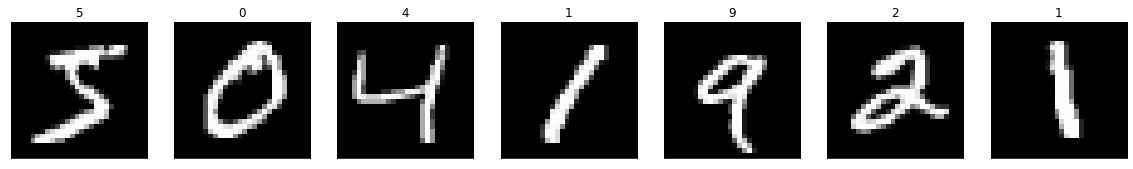

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig=plt.figure(figsize=(20,20))
for i in range(7):
    ax=fig.add_subplot(1,7,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))
    

# Rescaling Images  

In [34]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)

X_train Shape:  (60000, 28, 28)
y_train Shape:  (60000,)


# Building A MLP Architecture

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compiling Our Model

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Train The Model


In [38]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2540 - accuracy: 0.9263 - val_loss: 0.1229 - val_accuracy: 0.9639
Epoch 2/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1137 - accuracy: 0.9658 - val_loss: 0.0910 - val_accuracy: 0.9703
Epoch 3/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0843 - accuracy: 0.9741 - val_loss: 0.0798 - val_accuracy: 0.9757
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0652 - val_accuracy: 0.9789
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0660 - val_accuracy: 0.9796
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.0629 - val_accuracy: 0.9812
Epoch 7/10
60000/60000 [=========================

# Plot of loss per iteration 

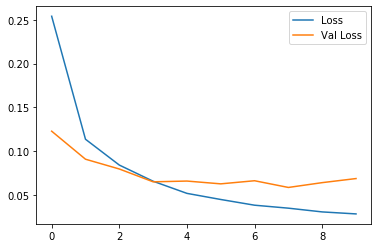

In [39]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.legend()

# Plot of Accuracy per iteration

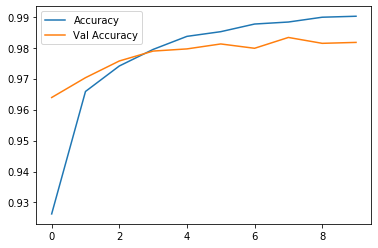

In [40]:
plt.plot(hist.history['accuracy'], label="Accuracy")
plt.plot(hist.history['val_accuracy'], label="Val Accuracy")
plt.legend()

# Evaluation on test set 

In [41]:
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0689 - accuracy: 0.9817
[0.06889076373045028, 0.9817]


# Confusion Matrix 

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


Confusion Matrix(Without Normalization)
[[ 972    0    2    0    1    1    2    1    1    0]
 [   0 1127    1    1    0    0    2    2    2    0]
 [   3    3 1004    4    4    0    3    5    5    1]
 [   0    0    5  988    0    7    0    5    1    4]
 [   2    0    3    0  966    0    2    1    1    7]
 [   2    0    0    4    1  880    2    1    1    1]
 [   4    3    0    1    2    9  937    0    2    0]
 [   1    6    4    2    0    0    0 1012    1    2]
 [   6    0    2    4    5    4    0    3  945    5]
 [   1    2    0    2    9    3    0    6    0  986]]


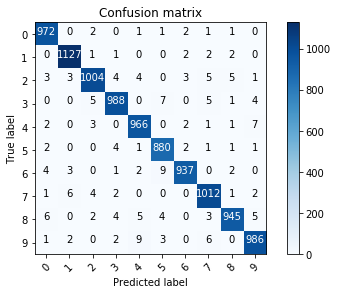

In [42]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float32')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix(Without Normalization)")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

        

# Let's See some misclassified examples  

Text(0.5, 1.0, 'True label is 2 and Predicted label is 7')

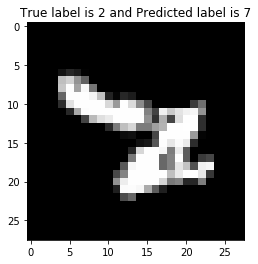

In [43]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label is {} and Predicted label is {}".format(y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label is 8 and Predicted label is 2')

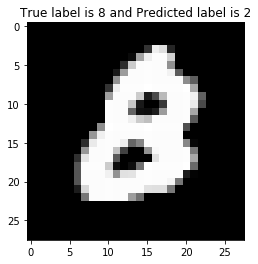

In [44]:
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label is {} and Predicted label is {}".format(y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label is 9 and Predicted label is 0')

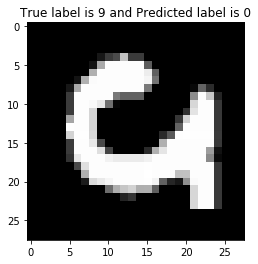

In [45]:
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label is {} and Predicted label is {}".format(y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label is 1 and Predicted label is 8')

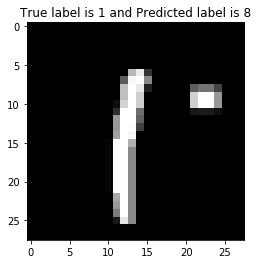

In [46]:
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label is {} and Predicted label is {}".format(y_test[i], p_test[i]))